In [549]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Fit model parabol linear regression cho dữ liệu: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [550]:
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv")

In [551]:
data

,Diện tích,Giá nhà
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


In [552]:
data['Diện tích mũ 2'] = data['Diện tích'] ** 2

In [553]:
data

,Diện tích,Giá nhà,Diện tích mũ 2
0,30.0000,-100.0000,900.000000
1,32.4138,-190.7250,1050.654430
2,34.8276,-269.7980,1212.961722
3,37.2414,-337.2180,1386.921874
4,39.6552,-392.9850,1572.534887
5,42.0690,-437.0990,1769.800761
6,44.4828,-469.5600,1978.719496
7,46.8966,-490.3690,2199.291092
8,49.3103,-499.5240,2431.505686
9,51.7241,-497.0270,2675.382521


In [554]:
class LinearRegression():
    def ___init__(self):
        self.w = None
    
    def fit(self, x, Y):
        one_col = np.ones((x.shape[0],1))
        X = np.column_stack((one_col,x))
        
        self.w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

    def predict(self, x):
        return np.sum(np.dot(x, self.w[1:]) + self.w[0])

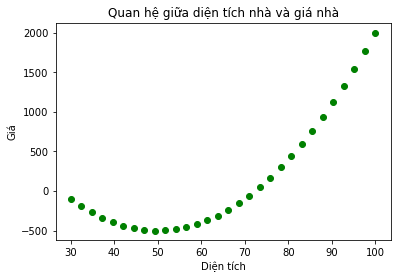

In [555]:
x = np.array(data['Diện tích'])
Y = np.array(data['Giá nhà'])
plt.plot(x, Y,'go')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.title('Quan hệ giữa diện tích nhà và giá nhà')
plt.show()

In [556]:
x = np.array(data[['Diện tích', 'Diện tích mũ 2']])
Y = np.array(data['Giá nhà'])

In [557]:
linear_model_1 = LinearRegression()
linear_model_1.fit(x, Y)

In [558]:
w = linear_model_1.w
w

array([ 2.00000579e+03, -1.00000222e+02,  1.00000199e+00])

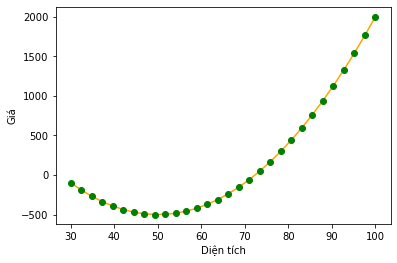

In [559]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
x_ = np.array(data['Diện tích'])
x_line = np.linspace(30,100,30)
y_line = [w_0 + w_1 * i + w_2 * (i*i) for i in x_line]
plt.plot(x_line,y_line,'orange')
plt.plot(x_, Y,'go')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

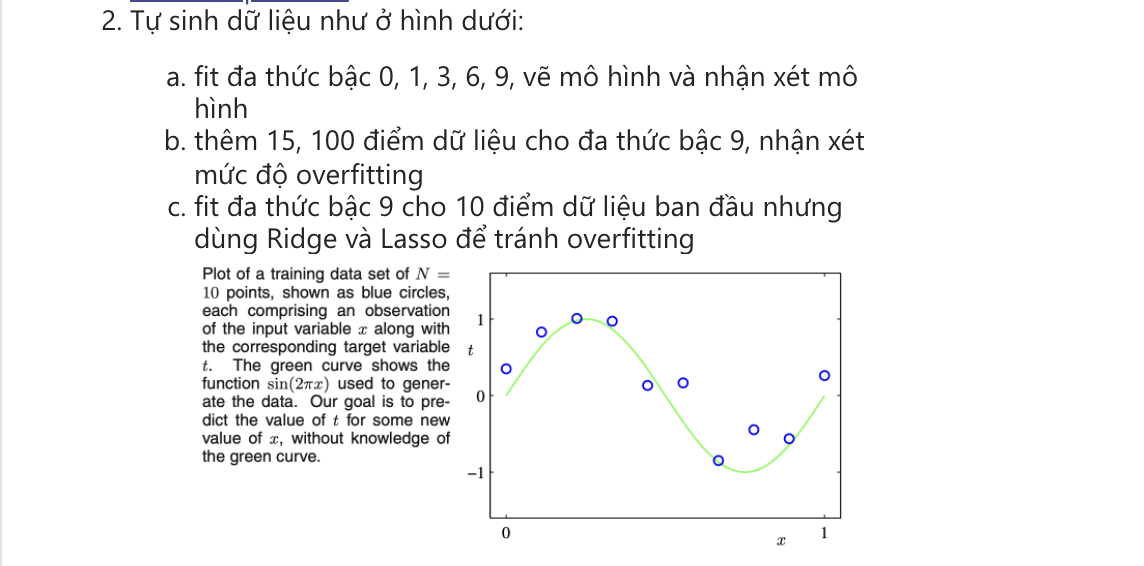

# Tạo dữ liệu như hình trên 

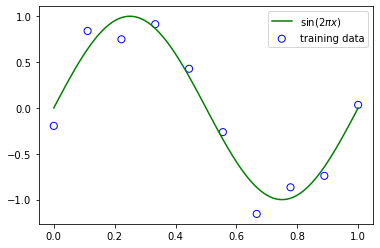

In [560]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.2)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor='None', edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# Create validation dataset 

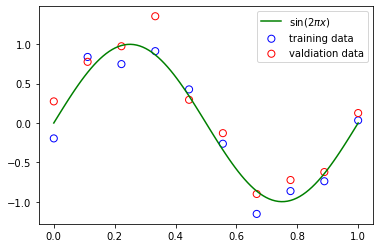

In [561]:
x_val, y_val = create_toy_data(func, 10, 0.2)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [562]:
def mse(y, y_pred):

    return np.sum(np.square(y - y_pred))

In [563]:
def polynomial_of_degree(x,num):
    x_degree = np.ones((x.shape[0],1)).reshape(-1,1)
    x = x.reshape(-1,1)
    for i in range(1,num+1):
        x_degree = np.hstack((x_degree,x**i))
    return x_degree

In [564]:
# print(X_train_degree_1)
# print("-----")
# x_degree = np.ones((x_train.shape[0],1)).reshape(-1,1)
# x = x_train.reshape(-1,1)
# for i in range(1,3+1):
#     x_degree = np.hstack((x_degree,x**i))
#     print(x_degree)
    
# 0.11111111 ** 3
# print(x_train)
# print(y_train)
print(x_test)
# print(y_test)
# print(x_val)
# print(y_val)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

# Đa thức bậc 0

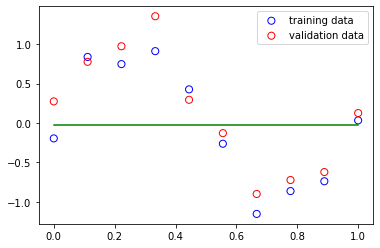

In [565]:
X_train_degree_0 = polynomial_of_degree(x_train, 0)
# print(x_train)
# print(X_train_degree_0)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_0.T, X_train_degree_0)),np.dot(X_train_degree_0.T,y_train)) 
X_test = polynomial_of_degree(x_test, 0)
# print(w)
# print(X_test)
predict = np.dot(X_test,w)
# print(predict)


plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [566]:
y_pred = np.dot(X_train_degree_0,w)
loss = mse(y_train,y_pred)
val_pred_0 = np.dot(polynomial_of_degree(x_val,0),w)
loss_val_0 = mse(y_val, val_pred_0)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_0))

Loss in training set: 5.017148873241936
Loss in validation set: 5.4012675385782885


# Đa thức bậc 1 

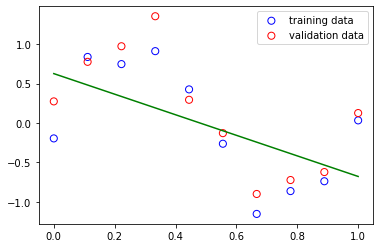

In [567]:
X_train_degree_1 = polynomial_of_degree(x_train, 1)
# print(x_train)
# print(X_train_degree_1)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_1.T, X_train_degree_1)),np.dot(X_train_degree_1.T,y_train)) 
X_test = polynomial_of_degree(x_test, 1)
# print(w)
# print(X_test)
predict = np.dot(X_test,w)
# print(predict)


plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [568]:
y_pred = np.dot(X_train_degree_1,w)
loss = mse(y_train,y_pred)
val_pred_1 = np.dot(polynomial_of_degree(x_val,1),w)
loss_val_1 = mse(y_val, val_pred_1)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_1))

Loss in training set: 3.276686963147569
Loss in validation set: 3.2426369079580395


# => Underfitting

# Đa thức bậc 3

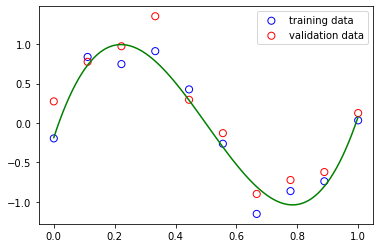

In [569]:
X_train_degree_3 = polynomial_of_degree(x_train, 3)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_3.T, X_train_degree_3)),np.dot(X_train_degree_3.T,y_train)) 
X_test = polynomial_of_degree(x_test, 3)
predict = np.dot(X_test,w)


plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [570]:
y_pred = np.dot(X_train_degree_3,w)
loss = mse(y_train,y_pred)
val_pred_3 = np.dot(polynomial_of_degree(x_val,3),w)
loss_val_3 = mse(y_val, val_pred_3)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_3))

Loss in training set: 0.26534726538804787
Loss in validation set: 0.7140517177262503


# => Good fit

# Đa thức bậc 6

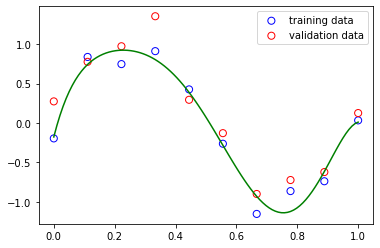

In [571]:
X_train_degree_6 = polynomial_of_degree(x_train, 6)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_6.T, X_train_degree_6)),np.dot(X_train_degree_6.T,y_train)) 
X_test = polynomial_of_degree(x_test, 6)
predict = np.dot(X_test,w)


plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [572]:
y_pred = np.dot(X_train_degree_6,w)
loss = mse(y_train,y_pred)
val_pred_6 = np.dot(polynomial_of_degree(x_val,6),w)
loss_val_6 = mse(y_val, val_pred_6)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_6))

Loss in training set: 0.18677148604388316
Loss in validation set: 0.7185569116892613


# => Goodfit

# Đa thức bậc 9

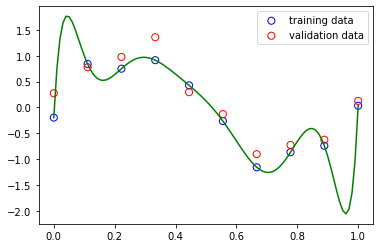

In [573]:
X_train_degree_9 = polynomial_of_degree(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_9.T, X_train_degree_9)),np.dot(X_train_degree_9.T,y_train)) 
X_test = polynomial_of_degree(x_test, 9)
predict = np.dot(X_test,w)


plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [574]:
y_pred = np.dot(X_train_degree_9,w)
loss = mse(y_train,y_pred)
val_pred_9 = np.dot(polynomial_of_degree(x_val,9),w)
loss_val_9 = mse(y_val, val_pred_9)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 1.8959537415248224e-07
Loss in validation set: 0.6158203402687031


# => Overfitting

# Thêm 15 điểm dữ liệu cho đa thức bậc 9

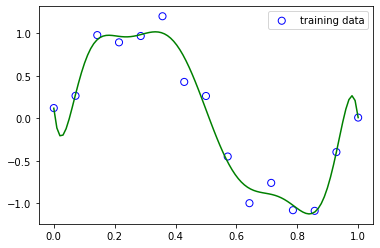

In [575]:
x_train_15, y_train_15 = create_toy_data(func, 15, 0.25)

X_train_degree_9 = polynomial_of_degree(x_train_15, 9)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_9.T, X_train_degree_9)),np.dot(X_train_degree_9.T,y_train_15)) 
X_test = polynomial_of_degree(x_test, 9)
predict = np.dot(X_test,w)


plt.plot(x_test,predict,'g')
plt.scatter(x_train_15, y_train_15, facecolor="none", edgecolor="b", s=50, label="training data")
# plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [576]:
y_pred = np.dot(X_train_degree_9,w)
loss = mse(y_train_15,y_pred)
val_pred_9 = np.dot(polynomial_of_degree(x_val,9),w)
loss_val_9 = mse(y_val, val_pred_9)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 0.2135048571252147
Loss in validation set: 0.49142993289459325


# Thêm 100 điểm dữ liệu cho đa thức bậc 9


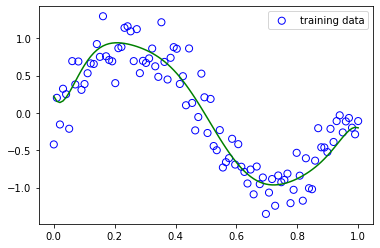

In [577]:
x_train_100, y_train_100 = create_toy_data(func, 100, 0.25)

X_train_degree_9 = pre_process(x_train_100, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)), np.dot(np.transpose(X_train_9),y_train_100))
X_test = polynomial_of_degree(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train_, y_train_, facecolor="none", edgecolor="b", s=50, label="training data")
# plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [578]:
y_pred = np.dot(X_train_degree_9,w)
loss = mse(y_train_100,y_pred)
val_pred_9 = np.dot(polynomial_of_degree(x_val,9),w)
loss_val_9 = mse(y_val, val_pred_9)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 5.930008890976786
Loss in validation set: 0.567456511102746


# => Thêm điểm dữ liệu sẽ giúp chúng ta tránh được overfitting

# Dùng Ridge regression để tránh overfitting 

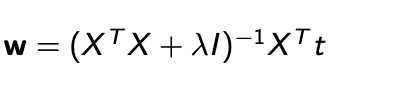

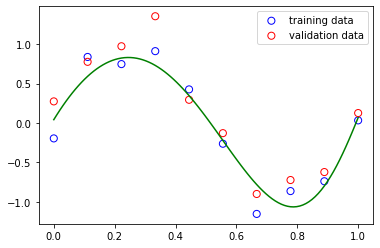

In [579]:
alpha = 0.001
X_train_degree_9 = polynomial_of_degree(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(X_train_degree_9.T, X_train_degree_9) + alpha*np.identity(x_train.shape[0])),np.dot(X_train_degree_9.T,y_train)) 
X_test = polynomial_of_degree(x_test, 9)
predict = np.dot(X_test,w)


plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [580]:
y_pred = np.dot(X_train_degree_9,w)
loss = mse(y_train,y_pred)
val_pred_9 = np.dot(polynomial_of_degree(x_val,9),w)
loss_val_9 = mse(y_val, val_pred_9)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 0.34816814030963195
Loss in validation set: 0.6766425378743046


In [581]:
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [582]:
model = LassoRegression(iterations = 1000, learning_rate = 0.01, l1_penality = 0.005 )

In [583]:
 model.fit(polynomial_of_degree(x_train, 9), y_train )

In [584]:
w_lasso = model.W
w_lasso

array([ 0.27117262, -0.68087406, -0.75544234, -0.49522942, -0.22236787,
        0.00210394,  0.16955625,  0.30156559,  0.40263101,  0.48042427])

In [585]:
predict = model.predict(polynomial_of_degree(x_test, 9))
predict

array([ 0.54721525,  0.54026014,  0.53314778,  0.52587503,  0.51843868,
        0.51083548,  0.50306211,  0.49511522,  0.48699139,  0.47868715,
        0.47019898,  0.46152334,  0.45265659,  0.4435951 ,  0.43433518,
        0.42487309,  0.41520509,  0.40532739,  0.39523618,  0.38492765,
        0.37439797,  0.36364332,  0.35265987,  0.34144384,  0.32999147,
        0.31829901,  0.30636283,  0.29417932,  0.28174497,  0.26905641,
        0.25611035,  0.24290369,  0.22943348,  0.21569699,  0.20169171,
        0.1874154 ,  0.17286612,  0.15804225,  0.14294256,  0.12756623,
        0.11191293,  0.09598282,  0.07977666,  0.06329581,  0.04654238,
        0.02951919,  0.01222993, -0.00532077, -0.02312733, -0.04118303,
       -0.05947997, -0.07800896, -0.09675942, -0.11571922, -0.1348746 ,
       -0.15421004, -0.17370806, -0.19334915, -0.21311156, -0.23297116,
       -0.25290122, -0.27287229, -0.29285195, -0.31280461, -0.3326913 ,
       -0.35246943, -0.37209254, -0.39151007, -0.41066705, -0.42

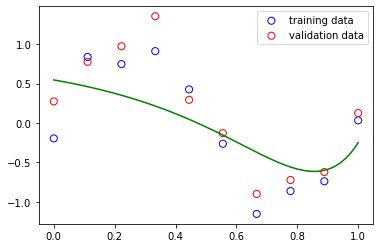

In [586]:
plt.plot(x_test,predict,'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [587]:
y_pred = np.dot(X_train_degree_9,w_lasso)
loss = mse(y_train,y_pred)
val_pred_9 = np.dot(polynomial_of_degree(x_val,9),w_lasso)
loss_val_9 = mse(y_val, val_pred_9)
print('Loss in training set: {}'.format(loss))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 3.094567862751869
Loss in validation set: 4.099506888627543
